In [60]:
#importing required libraries
import pandas as pd #preprocessing and analysis
import numpy as np #analysis
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations

In [2]:
#read csv file
df = pd.read_csv('titanic.csv')

In [3]:
#display first five rows of dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#display last five rows of dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
#Find non-null values in each column and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
# renaming column names
df.columns = ['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']

In [38]:
#check column names
df.head()

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# finding total number of null values in 'age' column
df.age.isnull().sum()

177

In [55]:
#finding column wise total missing values and corresponding percentage values 
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
cabin,687,77.1
age,177,19.9
embarked,2,0.2
fare,0,0.0
ticket,0,0.0


In [57]:
#find total number of missing values in each column
total = df.isnull().sum().sort_values(ascending=False)
total

cabin          687
age            177
embarked         2
fare             0
ticket           0
parch            0
sibsp            0
sex              0
name             0
pclass           0
survived         0
passengerId      0
dtype: int64

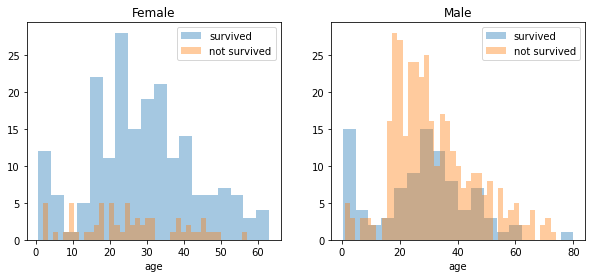

In [61]:
survived = 'survived'
not_survived = 'not survived'

#creating a figure with layout with one row and two columns with mentioned figure size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

#selecting columns for plotting
women = df[df['sex']=='female']
men = df[df['sex']=='male']

#female plot
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

#male plot
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [63]:
#drop unnecessary columns
cols = ['name', 'ticket', 'cabin']
df.drop(cols, axis=1, inplace=True) #inplace = True - helps updating the values directly in df
df.head()

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
#check columns
df.columns

Index(['passengerId', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked'],
      dtype='object')

In [66]:
#mean of age column before interpolating missing values
df['age'].mean()

29.69911764705882

In [73]:
#imputing missing values in age column using interpolate() 
df['age'] = df['age'].interpolate()

In [80]:
#check non-null values
#age column has got 0 null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          891 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [94]:
df.head()

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [95]:
#Converting categorical columns to numerical columns
dummies = []

#get_dummies() function helps us to get the numerical data for the categorical columns. 
#It takes values from the respective column and rename their column names with values.
cols = ['pclass', 'sex', 'embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
titanic_dummies = pd.concat(dummies, axis=1)

#converted 3 categorical columns to numerical
titanic_dummies

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [96]:
#concatinating the dummy columns to the dataframe 
df = pd.concat((df, titanic_dummies), axis=1)
df.head()

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [98]:
#drop the duplicate data now. Since 'pclass', 'sex' and 'embarked' values are present in numerical form now
df = df.drop(['pclass', 'sex', 'embarked'], axis =1)

In [109]:
#check
df.head()

,passengerId,survived,age,sibsp,parch,fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [101]:
#check non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   1            891 non-null    uint8  
 7   2            891 non-null    uint8  
 8   3            891 non-null    uint8  
 9   female       891 non-null    uint8  
 10  male         891 non-null    uint8  
 11  C            891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


In [105]:
#converting df to numpy array(independent values)
x = df.values
x

array([[  1. ,   0. ,  22. , ...,   0. ,   0. ,   1. ],
       [  2. ,   1. ,  38. , ...,   1. ,   0. ,   0. ],
       [  3. ,   1. ,  26. , ...,   0. ,   0. ,   1. ],
       ...,
       [889. ,   0. ,  22.5, ...,   0. ,   0. ,   1. ],
       [890. ,   1. ,  26. , ...,   1. ,   0. ,   0. ],
       [891. ,   0. ,  32. , ...,   0. ,   1. ,   0. ]])

In [103]:
#converting to np array (dependent value)
y = df['survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [108]:
#since dependent value is present in 'x', drop the column('survived') from 'x'
x = np.delete(x, 1, axis =1)
x

array([[  1. ,  22. ,   1. , ...,   0. ,   0. ,   1. ],
       [  2. ,  38. ,   1. , ...,   1. ,   0. ,   0. ],
       [  3. ,  26. ,   0. , ...,   0. ,   0. ,   1. ],
       ...,
       [889. ,  22.5,   1. , ...,   0. ,   0. ,   1. ],
       [890. ,  26. ,   0. , ...,   1. ,   0. ,   0. ],
       [891. ,  32. ,   0. , ...,   0. ,   1. ,   0. ]])

   ## Tada!! Now the data is ready for modelling!